# Debt to GDP Calculations
---

### Import Libraries 

In [1]:
import os
import csv

import pandas as pd 
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

### Import `debtToGDP.py` 

In [2]:
import debtToGDP as dtg
debtion = dtg.DEBT(dtg.measurements)

### Set Y-Ticks 

In [3]:
# Set YTicks to Millions
def millions(x, pos):
    return '%1.1fT' % (x * 1e-6)

def percentages(x, pos): 
    return '%1.1fp' % (x*100)

formatterMilly = FuncFormatter(millions)
formatterPercent = FuncFormatter(percentages)

## Debt By Category:
---

In [4]:
# Total Household and Non-Profit Debt 
house_debt = debtion.total_household_nonprofit_debt()

# Total US Government Debt 
gov_debt = debtion.total_gov_debt()

# Total US Business Debt 
biz_debt = debtion.total_business_debt()

### Plot

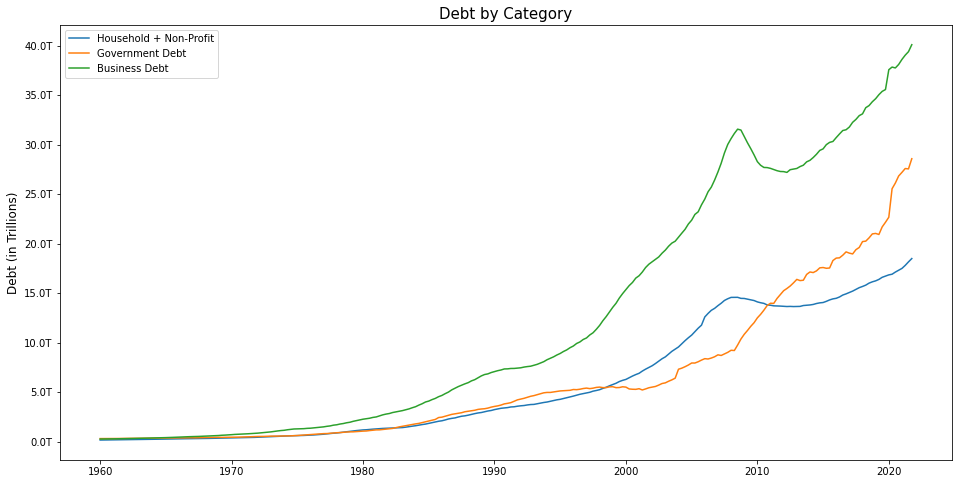

In [5]:
# Plotting 
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(house_debt['debt_sum'], label='Household + Non-Profit')
ax.plot(gov_debt['debt_sum'], label='Government Debt')
ax.plot(biz_debt['debt_sum'], label='Business Debt')

ax.set_title('Debt by Category', fontsize=15)
ax.set_ylabel('Debt (in Trillions)', fontsize=12)
ax.yaxis.set_major_formatter(formatterMilly)
ax.legend(loc=2)

## Debt to GDP
---

In [6]:
# US Debt to GDP
d_gdp = debtion.usDebt_to_gdp()

# YOY Debt to GDP Change
yoy = debtion.yoy_debt_to_gdp_change()

### Plot

Text(0.5, 1.0, 'US Debt to GDP Changes')

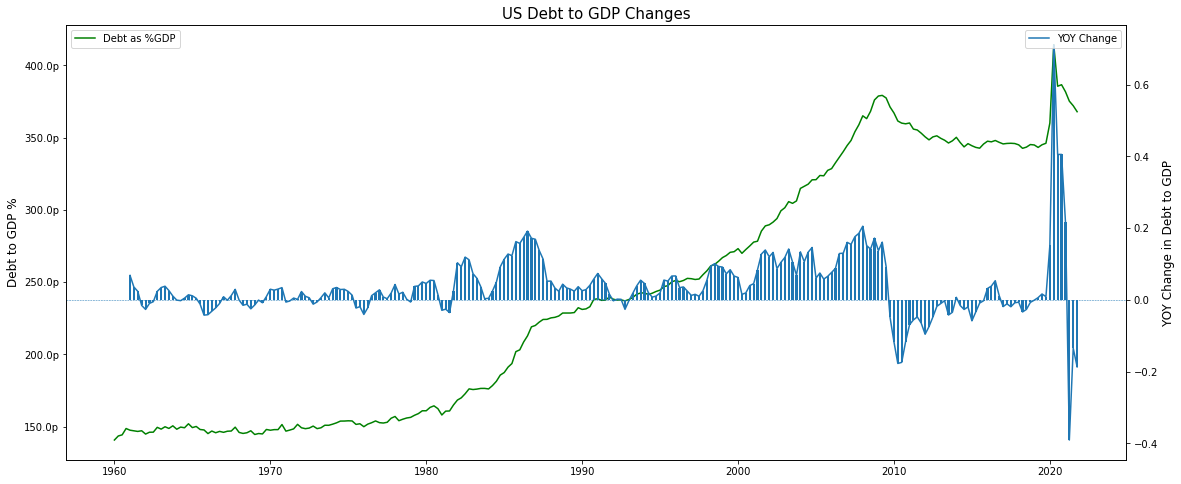

In [12]:
# Plotting 
fig, ax = plt.subplots(figsize=(19,8))

ax.plot(d_gdp['Debt_as_%_GDP'], label='Debt as %GDP',color='g')
ax.set_ylabel('Debt to GDP %', fontsize=12)
ax.yaxis.set_major_formatter(formatterPercent)
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(yoy.index,yoy['Change'], label='YOY Change')
ax2.bar(yoy.index, yoy['Change'], width=50)
ax2.legend(loc=1)
ax2.axhline(y=0, linewidth=.5, linestyle='--')
ax2.set_ylabel('YOY Change in Debt to GDP', fontsize=12)
ax2.set_title('US Debt to GDP Changes', fontsize=15)